# Calculate bidisperse concentration field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynamix import io, data, measure, color, plotting, exposure
%matplotlib notebook

## Load example data

In [2]:
phi = 0.3
ims, logfile = io.load_radio_txtfiles('/Volumes/LTS/Eranga/txt/' + str(phi) + '/',tmin=20)
logfile['detector'] = {}
logfile['detector']['resolution'] = 20 # px/mm - set in ForwardProjector

## Apply an ROI to remove weird external box from James's data

(980, 400, 400)
(980, 390, 390)


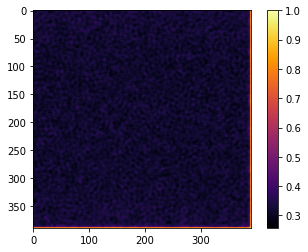

In [3]:
print(ims.shape)
ims, logfile = exposure.apply_ROI(ims,
                                  logfile,
                                  left=10,
                                  top=10
                                 )
print(ims.shape)
plt.imshow(ims[0])
plt.colorbar()
plt.show()

## Get bidisperse values

In [8]:
X, Y, peak_fraction, wavelength, radialspec = measure.bidisperse_concentration_map(ims,
                                                                                   logfile,
                                                                                   s_a=0.5,
                                                                                   s_b=1.0,
                                                                                   pad=1.2,
                                                                                   return_FFTs=True,
                                                                                   patchw=128,
                                                                                   tmax=10
                                                                                  )

## Plot peak fraction

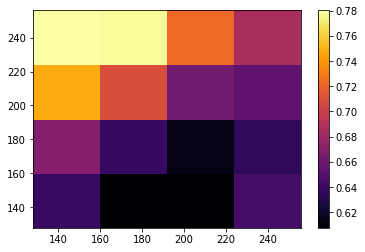

In [9]:
plt.pcolormesh(X,Y,np.mean(peak_fraction,axis=0))
plt.colorbar()
plt.show()

## Investigate wavelength decomposition

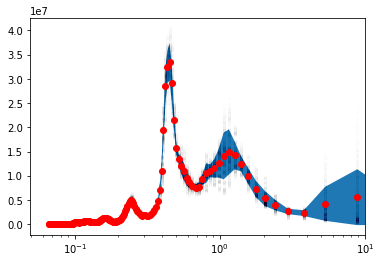

In [10]:
plt.clf()
# %matplotlib notebook
%matplotlib inline

nt,nx,ny,_ = radialspec.shape
for t in range(nt):
    for x in range(nx):
        for y in range(ny):
            plt.semilogx(wavelength,radialspec[t,x,y],'k.',alpha=0.002)

mean_rad = np.mean(radialspec,axis=(0,1,2))
std_rad  =  np.std(radialspec,axis=(0,1,2))
plt.fill_between(wavelength,mean_rad-std_rad,mean_rad+std_rad)
plt.plot(wavelength,mean_rad,'ro')

plt.xlim(xmax=10)
plt.show()

## Do everything in one go

In [ ]:
%matplotlib inline

import time
time.sleep(5000)

for phi in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    ims, logfile = io.load_radio_txtfiles('/Volumes/LTS/Eranga/txt/' + str(phi) + '/',tmin=20)
    logfile['detector'] = {}
    logfile['detector']['resolution'] = 20 # px/mm - set in ForwardProjector

    ims, logfile = exposure.apply_ROI(ims,
                                      logfile,
                                      left=10,
                                      top=10
                                     )

    X, Y, peak_fraction, wavelength, radialspec = measure.bidisperse_concentration_map(ims,
                                                                                       logfile,
                                                                                       s_a=0.5,
                                                                                       s_b=1.0,
                                                                                       pad=1.2,
                                                                                       return_FFTs=True,
                                                                                       patchw=128, # 256 pixel patches - 12.8mm
                                                                                       tmax=2
                                                                                      )

    plt.pcolormesh(X,Y,np.mean(peak_fraction,axis=0))
    plt.colorbar()
    plt.savefig('peak_fraction_averaged_phi_' + str(phi) + '.png',dpi=200)
#     plt.show()

    plt.clf()

    nt,nx,ny,_ = radialspec.shape
    for t in range(nt):
        for x in range(nx):
            for y in range(ny):
                plt.semilogx(wavelength,radialspec[t,x,y],'k.',alpha=0.002)

    mean_rad = np.mean(radialspec,axis=(0,1,2))
    std_rad  =  np.std(radialspec,axis=(0,1,2))
    plt.fill_between(wavelength,mean_rad-std_rad,mean_rad+std_rad)
    plt.plot(wavelength,mean_rad,'ro')

    plt.xlim(xmax=10)
#     plt.show()
    plt.savefig('wavelengths_phi_' + str(phi) + '.png',dpi=200)

    print('Done ' + str(phi))